1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

2. Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. Membaca Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/dataset.csv')  # Ubah 'nama_dataset.csv' sesuai dengan nama file dataset Anda

4. Menampilkan data dari Dataset

In [ ]:
print(data)
data.info()

     Label_Cuaca  Minimum Temperature  Maximum Temperature  Rainfall
0     2021-01-01                 24.3                 32.1       1.5
1     2021-01-02                 25.1                 33.3       0.0
2     2021-01-03                 24.2                 31.3      23.4
3     2021-01-04                 23.1                 31.7       9.7
4     2021-01-05                 23.4                 33.8       0.0
...          ...                  ...                  ...       ...
1186  2024-04-01                 25.5                 31.3      15.3
1187  2024-04-02                 25.7                 32.5      19.4
1188  2024-04-03                 25.2                 33.9       1.6
1189  2024-04-04                 25.3                 33.0       3.6
1190  2024-04-05                 25.8                 33.8       1.0

[1191 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 4 columns):
 #   Column               Non-Null Count 

5. Persiapan Data untuk Model LSTM

In [ ]:
# 2. Persiapan Data untuk Model LSTM
# Pisahkan fitur (features) dan label (labels)
features = data[['Minimum Temperature', 'Maximum Temperature', 'Rainfall']]
labels = data[['Minimum Temperature', 'Maximum Temperature', 'Rainfall']]

6. Pisahkan data menjadi data latih dan data uji




In [ ]:
# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

7. Pemodelan dengan LSTM menggunakan TensorFlow





In [ ]:
# 3. Pemodelan dengan LSTM menggunakan TensorFlow
# Tentukan jumlah time steps (jumlah langkah waktu) dan jumlah fitur
n_timesteps = 1  # Untuk keperluan contoh sederhana, kita akan menggunakan 1 time step
n_features = 3    # Jumlah fitur: temperatur minimum, temperatur maksimum, dan curah hujan

8. Tentukan model LSTM itu sendiri

In [ ]:
# Tentukan model LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, activation='relu', return_sequences=True, input_shape=(n_timesteps, n_features)),
    tf.keras.layers.LSTM(units=50, activation='relu'),
    tf.keras.layers.Dense(units=3)  # Output layer dengan 3 neuron untuk tiga parameter cuaca
])

9. Kompilasi Model LSTM

In [ ]:
# Kompilasi model
model.compile(optimizer='adam', loss='mse')

10. Melatih model dengan data yang ada

In [ ]:
# 4. Pelatihan Model
# Latih model
history = model.fit(X_train.values.reshape(-1, n_timesteps, n_features), y_train, epochs=100, batch_size=32, validation_data=(X_test.values.reshape(-1, n_timesteps, n_features), y_test))

Epoch 1/100
30/30 [==============================] - 4s 9ms/step - loss: 820.5115 - val_loss: 644.0506
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 460.9305 - val_loss: 107.9831
Epoch 3/100
30/30 [==============================] - 0s 9ms/step - loss: 56.4618 - val_loss: 8.6276
Epoch 4/100
30/30 [==============================] - 0s 9ms/step - loss: 6.9827 - val_loss: 4.7198
Epoch 5/100
30/30 [==============================] - 0s 9ms/step - loss: 2.9880 - val_loss: 3.3464
Epoch 6/100
30/30 [==============================] - 0s 8ms/step - loss: 1.6683 - val_loss: 2.7156
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 1.1197 - val_loss: 2.3860
Epoch 8/100
30/30 [==============================] - 0s 9ms/step - loss: 0.9566 - val_loss: 2.0930
Epoch 9/100
30/30 [==============================] - 0s 8ms/step - loss: 0.8020 - val_loss: 1.9151
Epoch 10/100
30/30 [==============================] - 0s 8ms/step - loss: 0.7503 - val_loss: 1.6554


11. Evaluasi Model AI yang ada



In [ ]:
# 5. Evaluasi Model
# Evaluasi model
loss = model.evaluate(X_test.values.reshape(-1, n_timesteps, n_features), y_test)
print("Mean Squared Error (MSE):", loss)

8/8 [==============================] - 1s 14ms/step - loss: 758.7772
Mean Squared Error (MSE): 758.7772216796875


12. Prediksi Kondisi Cuaca

In [ ]:
# 6. Prediksi Kondisi Cuaca
# Gunakan model LSTM untuk memprediksi kondisi cuaca
input_data = np.array([[20, 30, 5]])  # Contoh data input: temperatur minimum = 20, temperatur maksimum = 30, curah hujan = 5
prediksi_cuaca = model.predict(input_data.reshape(-1, n_timesteps, n_features))
print("Prediksi kondisi cuaca (Minimum Temperature, Maximum Temperature, Rainfall):", prediksi_cuaca)

1/1 [==============================] - 0s 299ms/step
Prediksi kondisi cuaca (Minimum Temperature, Maximum Temperature, Rainfall): [[20.11138   30.012293   4.6130652]]


13. Melakukan Evaluasi Tambahan

In [ ]:
# 7. Evaluasi tambahan
# Hitung dan cetak Mean Absolute Error (MAE) dan R-squared
y_pred = model.predict(X_test.values.reshape(-1, n_timesteps, n_features))
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r_squared)

8/8 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 0.24996766885287922
R-squared: 0.9576296219280724


14. Melakukan Plotting Metrik Evaluasi dalam bentuk Grafik Batang

In [ ]:
# Plotting metrik evaluasi dalam bentuk grafik batang
metrics = ['MSE', 'R-squared', 'MAE']
values = [loss, r_squared, mae]

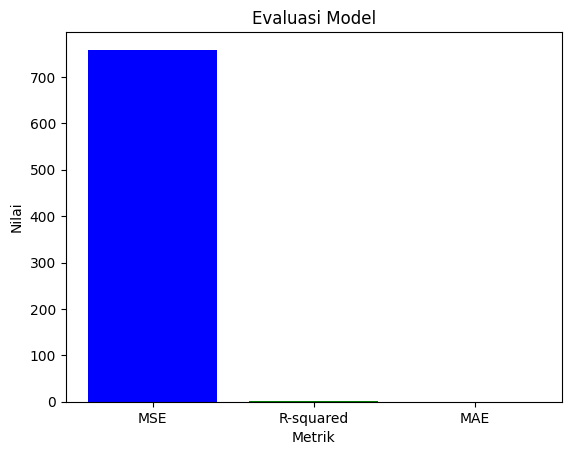

In [ ]:
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.title('Evaluasi Model')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()

In [ ]:
# Plotting prediksi untuk setiap fitur (Minimum Temperature, Maximum Temperature, Rainfall)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

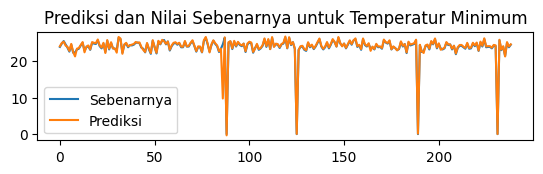

In [ ]:
# Plot temperatur minimum
plt.subplot(3, 1, 1)
plt.plot(y_test.iloc[:, 0].values, label='Sebenarnya')
plt.plot(y_pred[:, 0], label='Prediksi')
plt.title('Prediksi dan Nilai Sebenarnya untuk Temperatur Minimum')
plt.legend()

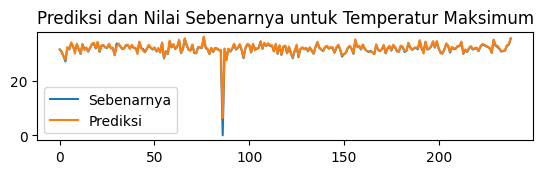

In [ ]:
# Plot temperatur maksimum
plt.subplot(3, 1, 2)
plt.plot(y_test.iloc[:, 1].values, label='Sebenarnya')
plt.plot(y_pred[:, 1], label='Prediksi')
plt.title('Prediksi dan Nilai Sebenarnya untuk Temperatur Maksimum')
plt.legend()


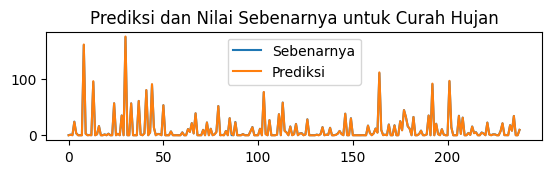

In [ ]:
# Plot curah hujan
plt.subplot(3, 1, 3)
plt.plot(y_test.iloc[:, 2].values, label='Sebenarnya')
plt.plot(y_pred[:, 2], label='Prediksi')
plt.title('Prediksi dan Nilai Sebenarnya untuk Curah Hujan')
plt.legend()

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>